#### We are going to analyze the dataset which contains 4000 default cases out of 94000 cases. There are also 30 variables in the dataset from A1 to A30.

In [125]:
import numpy as np #..............................................................................for dealing with arrays
import pandas as pd #.............................................................................for processing data
import matplotlib.pyplot as plt #.................................................................for visualization     
import matplotlib.gridspec as gridspec #..........................................................for customizing figure layout
%matplotlib inline 
import seaborn as sns#............................................................................for data visualization
from imblearn.over_sampling import SMOTE #........................................................for resampling
from sklearn import metrics #.....................................................................performance metrics
from sklearn.linear_model import LogisticRegression #.............................................machine learning model
from sklearn.metrics import roc_auc_score #.......................................................performance metrics
from sklearn.tree import DecisionTreeClassifier #.................................................machine learning model
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA #.....................feature engineering
from sklearn.preprocessing import StandardScaler #................................................for normalizing
from sklearn.impute import SimpleImputer #........................................................to replace missing values
from sklearn.metrics import confusion_matrix, precision_score ,auc, roc_curve #...................performance metrics
from sklearn.metrics import f1_score #............................................................performance metrics
import warnings #.................................................................................for removing warning signs
warnings.filterwarnings('ignore')

### Importing Data

In [126]:
train = pd.read_csv("Data Science HW design model.csv") #.........................reading training data
train.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,...,A22,A23,A24,A25,A26,A27,A28,A29,A30,default
0,10.69,86.10,8920.16,19912.85,30.42,31.72,1.18,145.41,2.236,1.786,...,0.01,0.01,0.01,0.13,0.00,0.00,0.00,0.00,0.00,0
1,28.50,65.19,6564.00,6716.67,32.50,23.40,2.74,91.11,1.000,1.000,...,0.06,0.01,0.00,0.09,285.80,0.00,16.44,1.98,42.26,0
2,24.87,73.79,4285.47,6463.75,40.50,51.53,2.84,93.90,2.400,1.400,...,0.08,0.02,0.02,0.44,494.62,135.41,127.45,46.00,14.92,0
3,13.64,85.82,6887.56,9244.44,49.56,53.44,0.36,171.45,1.875,2.167,...,0.03,0.01,0.00,0.05,1015.19,0.00,210.63,92.58,0.00,0
4,4.50,95.92,8746.50,19987.50,32.75,37.88,0.92,153.25,2.000,1.500,...,0.01,0.00,0.00,0.04,0.00,106.41,79.00,0.00,0.00,0


### Variable Description:
### Default: The actual classfication classes (0 = Non Default, 1 = Default).

### # print corelation matrix

In [127]:
train.corr()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,...,A22,A23,A24,A25,A26,A27,A28,A29,A30,default
A1,1.000000,-0.748951,-0.471054,-0.378873,0.492054,0.483082,0.526474,-0.373436,-0.331232,-0.295327,...,0.041449,0.005592,0.042981,0.039630,-0.052968,0.036289,-0.007522,-0.018154,-0.034801,0.224554
A2,-0.748951,1.000000,0.517863,0.407799,-0.482518,-0.482486,-0.618724,0.375246,0.410535,0.380494,...,-0.060587,-0.019050,-0.064202,-0.038414,0.056671,-0.030326,0.016198,0.022400,0.034842,-0.214566
A3,-0.471054,0.517863,1.000000,0.665712,-0.515764,-0.568834,-0.445058,0.547352,0.526460,0.487397,...,-0.068615,-0.022535,-0.067817,-0.012097,0.079143,-0.032491,0.028643,0.029465,0.044163,-0.173111
A4,-0.378873,0.407799,0.665712,1.000000,-0.315091,-0.412735,-0.379968,0.369470,0.493178,0.390337,...,-0.085139,-0.039447,-0.078386,-0.024151,0.044232,-0.052939,-0.003614,0.013625,0.031632,-0.123059
A5,0.492054,-0.482518,-0.515764,-0.315091,1.000000,0.903871,0.391876,-0.434256,-0.294310,-0.285118,...,0.029200,-0.009370,0.028006,0.020678,-0.060580,0.037347,-0.011727,-0.009589,-0.030253,0.180650
A6,0.483082,-0.482486,-0.568834,-0.412735,0.903871,1.000000,0.401520,-0.451374,-0.335913,-0.307062,...,0.036536,-0.004372,0.034941,0.020218,-0.061436,0.041389,-0.010940,-0.008679,-0.031773,0.178333
A7,0.526474,-0.618724,-0.445058,-0.379968,0.391876,0.401520,1.000000,-0.298279,-0.344282,-0.308982,...,0.076212,0.031466,0.073371,0.028496,-0.029096,0.048421,0.007466,-0.001576,-0.022805,0.166574
A8,-0.373436,0.375246,0.547352,0.369470,-0.434256,-0.451374,-0.298279,1.000000,0.287236,0.244410,...,-0.001955,0.024085,-0.005212,-0.007704,0.070861,-0.009729,0.044007,0.037701,0.042242,-0.150192
A9,-0.331232,0.410535,0.526460,0.493178,-0.294310,-0.335913,-0.344282,0.287236,1.000000,0.911302,...,-0.072741,-0.039863,-0.070636,0.033181,0.047023,-0.013711,0.023007,0.029357,0.024106,-0.132580
A10,-0.295327,0.380494,0.487397,0.390337,-0.285118,-0.307062,-0.308982,0.244410,0.911302,1.000000,...,-0.067156,-0.039082,-0.066107,0.050839,0.043492,-0.005433,0.024532,0.026497,0.020610,-0.125432


### Heatmap of correleation matrix

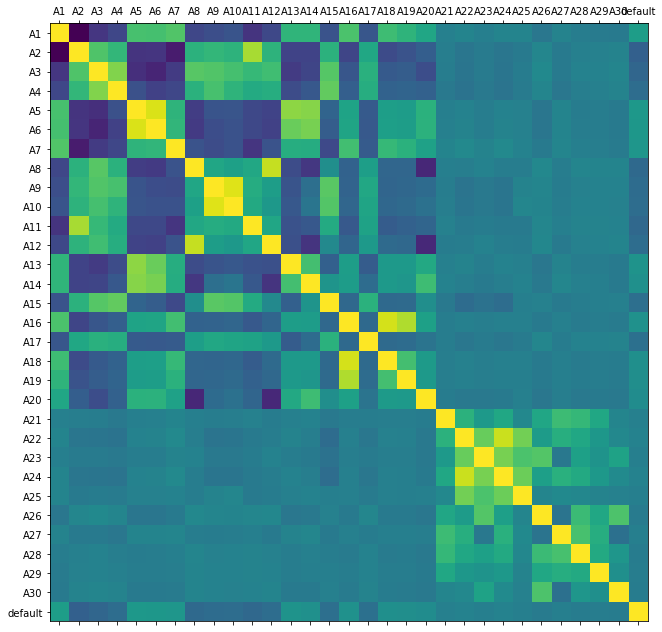

In [128]:
corr = train.corr()
fig, ax = plt.subplots(figsize=(11, 11))
ax.matshow(corr)
plt.xticks(range(len(corr.columns)), corr.columns)
plt.yticks(range(len(corr.columns)), corr.columns)
plt.show()

### Step 1- Clean and Prepare your data

### # Checking for null values.

In [129]:
null_columns=train.columns[train.isnull().any()]
train[null_columns].isnull().sum()

Series([], dtype: float64)

### # No null values found

### Checking the number of default values.

In [130]:
train['default'].value_counts()

0    90000
1     4000
Name: default, dtype: int64

In [131]:
cases = len(train)
nondefault_count = len(train[train.default == 0])
default_count = len(train[train.default == 1])
default_percentage = round(default_count/nondefault_count*100, 3)

print('CASE COUNT')
print('Total number of cases are {}'.format(cases))
print('Number of Non-default cases are {}'.format(nondefault_count))
print('Number of default cases are {}'.format(default_count))
print('Percentage of default cases is {}'.format(default_percentage))

CASE COUNT
Total number of cases are 94000
Number of Non-default cases are 90000
Number of default cases are 4000
Percentage of default cases is 4.444


### Out of 94000 cases there are 90000 non default cases and 4000 default cases.

#### This shows that the data is little unbalanced and needs to be treated before we can use it to train machine learning models.

### # Plotting the graph for A1 to A30 variables.

#### This is to see the distribution of all independent variables.

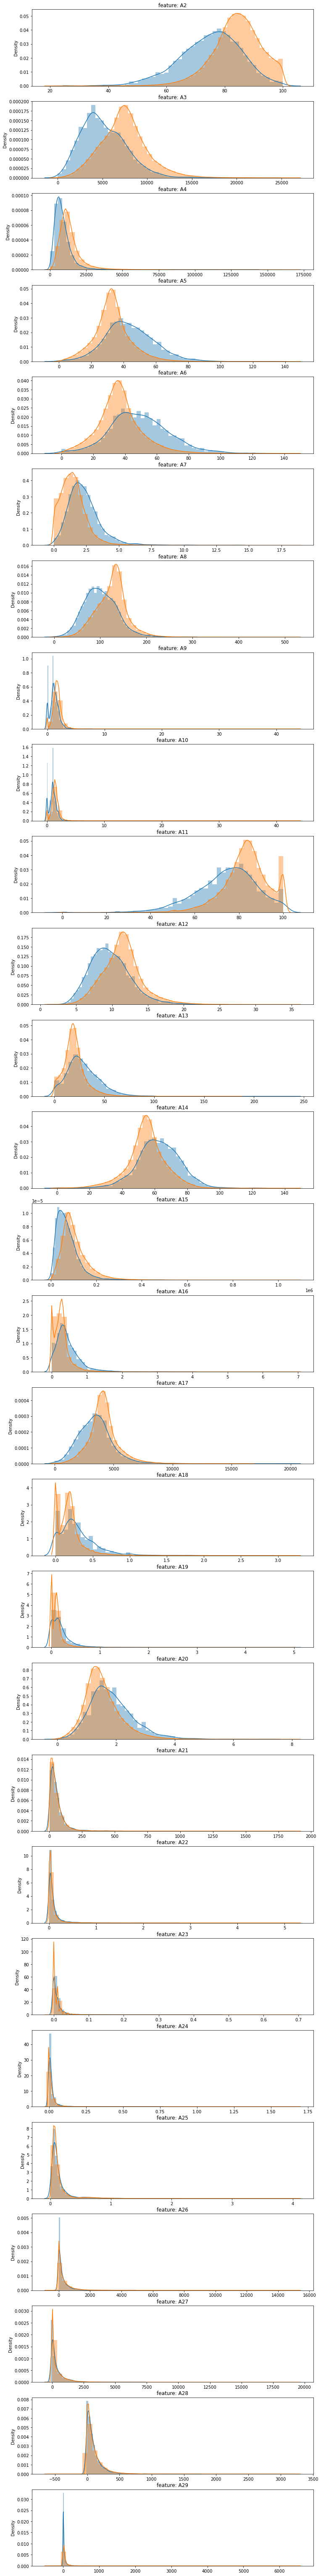

In [132]:
plt.figure(figsize=(12,28*4))

for i, cn in enumerate(train[train.iloc[:, 1:29].columns]):
   ax = plt.subplot(gs[i])
   sns.distplot(train[cn][train.default == 1], bins=50)
   sns.distplot(train[cn][train.default == 0], bins=50)
   ax.set_xlabel('')
   ax.set_title('feature: ' + str(cn))
plt.show()

### # Assigning values to testing and training data.

In [133]:
x_train = train.drop('default',axis=1) # ............................getting the independent variable values for training
y_train = train['default'] #.........................................getting the dependent variable values for training
test = pd.read_csv('Data Science HW design val.csv') # ..............importing testing data
x_test = test.drop('default',axis=1) #...............................getting the independent variable values for testing
y_test = test['default'] #...........................................getting the dependent variable values for training

### Resampling
#### The goal here is to create a dataset that has equal number of default and non-default cases.
#### We are resampling using the Synthetic Minority Oversampling Technique or SMOTE. This approach involves oversampling of the minority class which in this case is the 'default cases'.
#### Previously, we had 90000 non-default cases, and 4000 default cases. SMOTE approach will duplicate examples in minority class, so 4000 fraudulent cases will become around 90000 default cases. Now we have a total of 180000 cases (90k non-deafult + 90k default)

In [134]:
x_train, y_train = SMOTE().fit_resample(x_train, y_train) #.....................assigning the value of training data to function
x_test, y_test = SMOTE().fit_resample(x_test, y_test) #.........................assigning the value of testing data to function
print ('The number of transactions after resampling : ' + str(len(x_train)))
print ('Is the number of fraudulent transaction is equal to the number of normal tansactions? ' + str(sum(y_train == 0) == sum(y_train == 1)))

The number of transactions after resampling : 180000
Is the number of fraudulent transaction is equal to the number of normal tansactions? True


### Replacing the missing values with the mean of each column.
### We are replacing it with mean because it is a good representation of the true nature of each variable.

### # Assigning the values of testing and training data and replacing each missing value (which we are considering to be 0) with the mean of the column.

In [135]:
rep_0 = SimpleImputer(missing_values=0, strategy="mean")
cols=x_train.columns
x_train = pd.DataFrame(rep_0.fit_transform(x_train))
x_test = pd.DataFrame(rep_0.fit_transform(x_test))

x_train.columns = cols
x_test.columns = cols

x_train.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,...,A21,A22,A23,A24,A25,A26,A27,A28,A29,A30
0,10.69,86.10,8920.16,19912.85,30.42,31.72,1.18,145.41,2.236,1.786,...,10.0,0.01,0.010000,0.010000,0.13,320.172559,465.367131,105.155481,31.619806,62.213605
1,28.50,65.19,6564.00,6716.67,32.50,23.40,2.74,91.11,1.000,1.000,...,35.0,0.06,0.010000,0.020918,0.09,285.800000,465.367131,16.440000,1.980000,42.260000
2,24.87,73.79,4285.47,6463.75,40.50,51.53,2.84,93.90,2.400,1.400,...,31.0,0.08,0.020000,0.020000,0.44,494.620000,135.410000,127.450000,46.000000,14.920000
3,13.64,85.82,6887.56,9244.44,49.56,53.44,0.36,171.45,1.875,2.167,...,29.0,0.03,0.010000,0.020918,0.05,1015.190000,465.367131,210.630000,92.580000,62.213605
4,4.50,95.92,8746.50,19987.50,32.75,37.88,0.92,153.25,2.000,1.500,...,22.0,0.01,0.016762,0.020918,0.04,320.172559,106.410000,79.000000,31.619806,62.213605


# Feature extraction using LDA

In [136]:
sc = StandardScaler() #..................................................normalizing the testing and training data
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [137]:
lda = LDA(n_components=1)
x_train = lda.fit_transform(x_train, y_train)
x_test = lda.transform(x_test)

# 1st Model
## Logistic Regression

In [138]:
# Fit the model on train
model = LogisticRegression(solver="liblinear")
model.fit(x_train, y_train)
#predict on test
y_predict = model.predict(x_test)

coef_df = pd.DataFrame(model.coef_)
coef_df['intercept'] = model.intercept_
print(coef_df)

          0  intercept
0 -1.425208  -0.016551


## We are going to use 4 evaluation metrics:- Accuracy Score, F1 Score, Confusion Matrix, and ROC curve.
### Model score = No.of correct predictions / Total no.of predictions
### F1 score = 2 ( (precision recall) / (precision + recall) )

In [139]:
model_score = model.score(x_test, y_test)
print(model_score)

0.7721


In [140]:
f1_score(y_test, y_predict)

0.7719631779067441

cm without heatmap to know the number [[7715 2285]
 [2273 7727]]


<AxesSubplot:>

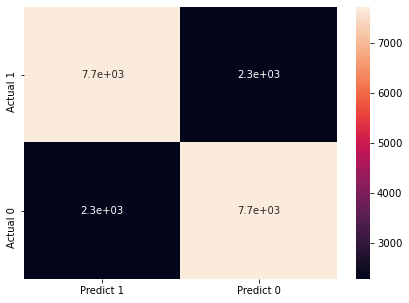

In [141]:
cm=metrics.confusion_matrix(y_test, y_predict, labels=[1, 0])
print('cm without heatmap to know the number', cm)
df_cm = pd.DataFrame(cm, index = [i for i in ["Actual 1","Actual 0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True)

In [142]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, model.predict_proba(x_test)[:,1])
roc_auc = roc_auc_score(y_test, model.predict_proba(x_test)[:, 1])

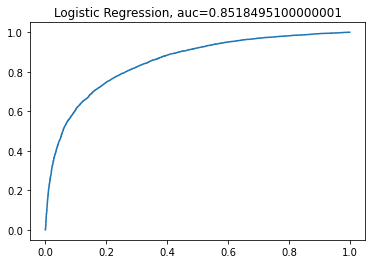

In [143]:
plt.figure()
plt.plot(fpr,tpr)
plt.title("Logistic Regression, auc="+str(roc_auc))
plt.show()

In [144]:
results1 = pd.DataFrame(y_predict, columns=['predictions']).to_csv('results1.csv')

# 2nd model
## Decision tree

In [145]:
clf = DecisionTreeClassifier(random_state=0)
clf.fit(x_train, y_train)
y_predict = clf.predict(x_test)
model_score = clf.score(x_test, y_test)
print(model_score)

0.69005


In [146]:
f1_score(y_test, y_predict)

0.6916073827172778

cm without heatmap to know the number [[6951 3049]
 [3150 6850]]


<AxesSubplot:>

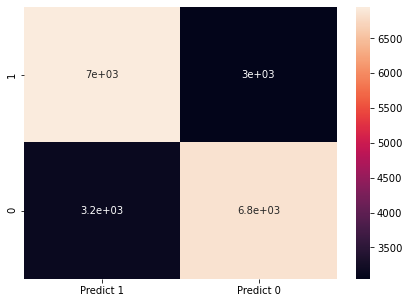

In [147]:
cm=metrics.confusion_matrix(y_test, y_predict, labels=[1, 0])
print('cm without heatmap to know the number', cm)
df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True)

In [148]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, model.predict_proba(x_test)[:,1])
roc_auc = roc_auc_score(y_test, model.predict_proba(x_test)[:, 1])

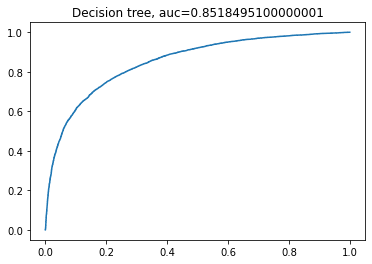

In [149]:
plt.figure()
plt.plot(fpr,tpr)
plt.title("Decision tree, auc="+str(roc_auc))
plt.show()

In [150]:
results2 = pd.DataFrame(y_predict, columns=['predictions']).to_csv('results2.csv')